<a href="https://colab.research.google.com/github/theadityashukla/EDA_SPECT_Heart/blob/master/SPECTF/Cardiac_Analysis_SPECTF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPECTF

## Loading Dependencies

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

## Importing the Data Set

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/theadityashukla/EDA_SPECT_Heart/master/SPECTF/SPECTF_train.csv")
df.head()

,1,59,52,70,67,73,66,72,61,58,52.1,72.1,71,70.1,77,66.1,65,67.1,55,61.1,57,68,66.2,72.2,74,63,64,56,54,67.2,54.1,76,74.1,65.1,67.3,66.3,56.1,62,56.2,72.3,62.1,74.2,74.3,64.1,67.4
0,1,72,62,69,67,78,82,74,65,69,63,70,70,72,74,70,71,72,75,66,65,73,78,74,79,74,69,69,70,71,69,72,70,62,65,65,71,63,60,69,73,67,71,56,58
1,1,71,62,70,64,67,64,79,65,70,69,72,71,68,65,61,61,73,71,75,74,80,74,54,47,53,37,77,68,72,59,72,68,60,60,73,70,66,65,64,55,61,41,51,46
2,1,69,71,70,78,61,63,67,65,59,59,66,69,71,75,65,58,60,55,62,59,67,66,74,74,64,60,57,54,70,73,69,76,62,64,61,61,66,65,72,73,68,68,59,63
3,1,70,66,61,66,61,58,69,69,72,68,62,71,71,71,63,59,74,75,70,69,83,77,73,70,41,37,39,40,58,46,75,73,65,66,67,69,70,66,70,64,60,55,49,41
4,1,57,69,68,75,69,74,73,71,57,61,72,74,73,69,61,58,60,55,71,62,79,70,77,71,65,63,69,55,61,68,75,74,63,64,63,58,69,67,79,77,72,70,61,65


In [0]:
target=df[['1']]
df=df.drop(labels='1',axis=1)

In [0]:
column_head=[(lambda x,y: "F"+str(x)+y) (x,y) for x in range(1,23) for y in ['R','S']]

In [0]:
df.columns=column_head

In [6]:
dft=pd.read_csv("https://raw.githubusercontent.com/theadityashukla/EDA_SPECT_Heart/master/SPECTF/SPECTF_test.csv")
dft.head()

,1,67,68,73,78,65,63,67.1,60,63.1,62,71,68.1,76,73.1,59,61,62.1,56,74,73.2,78.1,76.1,79,79.1,70,70.1,68.2,67.2,65.1,67.3,76.2,75,63.2,61.1,61.2,56.1,76.3,75.1,74.1,77,76.4,74.2,59.1,68.3
0,1,75,74,71,71,62,58,70,64,71,68,76,68,71,71,58,58,70,69,70,72,75,73,74,72,66,60,63,66,70,64,75,70,64,62,66,62,68,69,69,66,64,58,57,52
1,1,83,64,66,67,67,74,74,72,64,68,75,73,78,73,72,57,71,67,73,65,78,73,76,69,63,57,63,53,67,60,77,74,69,64,67,64,69,63,68,54,65,64,43,42
2,1,72,66,65,65,64,61,71,78,73,69,68,65,62,65,66,66,72,74,67,61,77,71,68,65,64,60,73,69,70,69,74,72,61,63,69,68,68,63,71,72,65,63,58,60
3,1,62,60,69,61,63,63,70,68,70,65,77,56,71,65,69,68,74,78,77,70,80,73,79,75,76,67,74,69,66,71,70,61,54,54,66,66,58,56,72,73,71,64,49,42
4,1,68,63,67,67,65,72,74,72,70,71,79,71,72,67,68,69,75,79,67,65,78,69,72,67,64,59,67,65,73,70,80,69,63,61,70,70,70,67,77,71,77,72,68,59


In [0]:
test_target=dft[['1']]
dft=dft.drop(labels='1',axis=1)
column_head=[(lambda x,y: "F"+str(x)+y) (x,y) for x in range(1,23) for y in ['R','S']]
dft.columns=column_head

In [8]:
dft.head(2)

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,75,74,71,71,62,58,70,64,71,68,76,68,71,71,58,58,70,69,70,72,75,73,74,72,66,60,63,66,70,64,75,70,64,62,66,62,68,69,69,66,64,58,57,52
1,83,64,66,67,67,74,74,72,64,68,75,73,78,73,72,57,71,67,73,65,78,73,76,69,63,57,63,53,67,60,77,74,69,64,67,64,69,63,68,54,65,64,43,42


In [9]:
df.head(1)

,F1R,F1S,F2R,F2S,F3R,F3S,F4R,F4S,F5R,F5S,F6R,F6S,F7R,F7S,F8R,F8S,F9R,F9S,F10R,F10S,F11R,F11S,F12R,F12S,F13R,F13S,F14R,F14S,F15R,F15S,F16R,F16S,F17R,F17S,F18R,F18S,F19R,F19S,F20R,F20S,F21R,F21S,F22R,F22S
0,72,62,69,67,78,82,74,65,69,63,70,70,72,74,70,71,72,75,66,65,73,78,74,79,74,69,69,70,71,69,72,70,62,65,65,71,63,60,69,73,67,71,56,58


## Principal Component Analysis

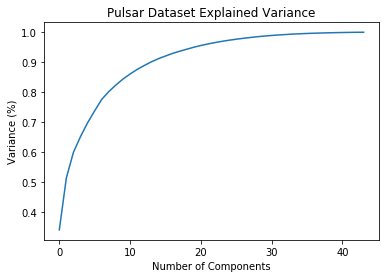

In [10]:
from sklearn.decomposition import PCA
pca = PCA().fit(df)
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

In [0]:
pc=PCA(n_components=34,svd_solver='randomized').fit(df)

In [0]:
x_train=pca.transform(df)

In [13]:
x_train

array([[-2.25153691e+01,  4.43400602e+00,  1.09025298e+01, ...,
         2.36547079e-01, -1.90600607e-01, -1.54656216e-01],
       [ 2.40190220e+01, -3.16216506e+01,  1.86551363e+01, ...,
        -8.22678816e-01, -1.57392166e+00, -1.01786125e+00],
       [-2.19734319e+00,  1.43263594e+01, -1.25115570e+01, ...,
         7.13284185e-01, -1.66991206e+00, -1.20327601e+00],
       ...,
       [-2.00323653e+01,  1.40177059e+01, -9.34358705e+00, ...,
        -7.95600589e-01,  5.07720674e-01,  2.11010169e-02],
       [ 6.43860906e+00, -1.74391901e+01, -6.30872656e+00, ...,
        -4.38786023e-01, -7.58102783e-01,  3.83601119e-01],
       [-1.04968178e+01,  8.34998664e+00,  3.96402167e+00, ...,
         7.85465149e-01,  2.21166304e-01, -4.88880228e-01]])

In [14]:
x_test=pca.transform(dft)
x_test

array([[ -1.17530963, -10.80210189,   1.69345964, ...,   0.6992736 ,
          1.08949346,  -0.57320507],
       [  8.4969187 ,  -7.7891098 ,  -1.81119436, ...,  -4.35426022,
          3.98596719,   0.70649879],
       [ -7.50081378,  -5.72300766,  16.19286928, ...,   3.68446802,
         -1.84276515,   0.83848757],
       ...,
       [-30.19021928,  -0.3435545 ,  -8.16100715, ...,  -1.46218476,
          0.79210118,   3.20569344],
       [-26.59534356,  10.57124998,  -7.1436282 , ...,  -2.58869222,
         -1.93432059,  -0.07608877],
       [-11.28520906,  -8.83121585,   9.72864556, ...,  -3.21410934,
          1.31835611,  -0.17280859]])

## K-Means Clusterning

In [0]:
from sklearn.cluster import KMeans

In [29]:
kmn=KMeans(n_clusters=2)
kmn.fit(df,target)
pred_value=kmn.predict(x_test)
accuracy_score(test_target,pred_value)

0.9193548387096774

In [30]:
kmn.n_iter_

4

## Support Vector Machines

In [0]:
from sklearn import svm

### Kernel: Linear Kernel ; C=10

In [18]:
svc=svm.SVC(kernel='linear',C=10)
svc.fit(x_train,target)
pred_val=svc.predict(x_test)
accuracy_score(test_target,pred_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7258064516129032

### Kernel: RBF ; C=940 ; Gamma = 0.004

In [19]:
svc=svm.SVC(kernel='rbf',gamma=0.0034,C=100000)
svc.fit(df,target)
pred_val=svc.predict(dft)
accuracy_score(test_target,pred_val)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.8118279569892473

### Kernel: Gaussian Kernel ; C=940 ; Gamma = 0.004

In [20]:
from sklearn.gaussian_process.kernels import RBF
gsvc=svm.SVC(kernel=RBF(),C=940,gamma=0.004).fit(x_train,target)
predict_gsvc=gsvc.predict(x_test)
accuracy_score(test_target,predict_gsvc)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.08064516129032258

## Naive Bayes

### Gaussian

In [21]:
from sklearn.naive_bayes import GaussianNB
naive=GaussianNB().fit(x_train,target)
naive_prediction=naive.predict(x_test)
accuracy_score(test_target,naive_prediction)

/usr/local/lib/python3.6/dist-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.45698924731182794

### Bernoulli

In [22]:
from sklearn.naive_bayes import BernoulliNB
naive_bern=BernoulliNB(alpha=8).fit(x_train,target)
nb_predict=naive_bern.predict(x_test)
accuracy_score(test_target,nb_predict)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6881720430107527